# Titanic Survivors
Predicting if a person survived or not in the Titanic

### Imports

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

In [98]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


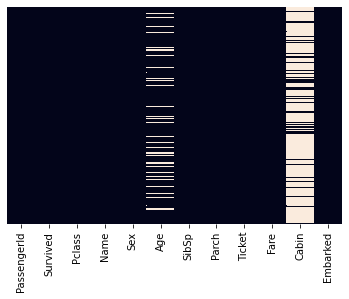

In [99]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

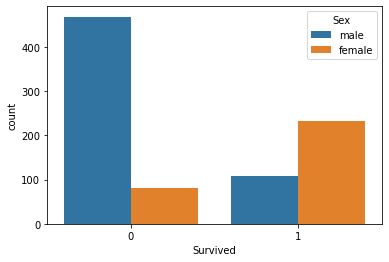

In [100]:
sns.countplot(x=df.Survived, data=df, hue='Sex')

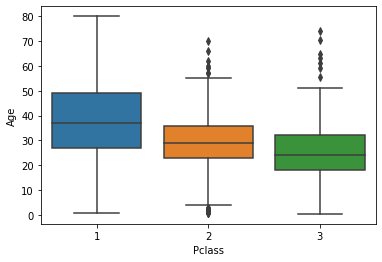

In [101]:
sns.boxplot(y=df.Age, x=df.Pclass)

In [102]:
p1=df[df.Pclass==1]['Age'].mean()
p2=df[df.Pclass==2]['Age'].mean()
p3=df[df.Pclass==3]['Age'].mean()

In [103]:
def age_aprox(cols):
    age,Pclass=cols
    if age == np.nan:
        return age
    elif Pclass ==1:
        age = p1
    elif Pclass ==2:
        age = p2
    elif Pclass ==3:
        age = p3
    return age

In [104]:
df['Age'] = df[['Age','Pclass']].apply(age_aprox,axis=1)

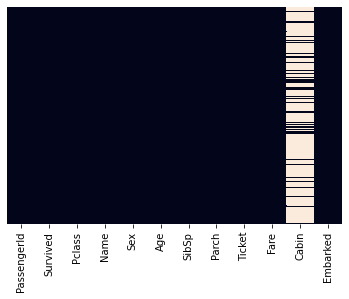

In [105]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [106]:
df.drop('Cabin', axis=1, inplace=True)

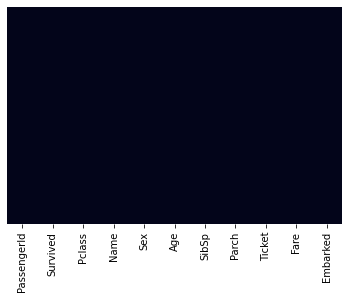

In [107]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,square=False)

In [108]:
df.dropna(inplace=True)

In [109]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.140620,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.233441,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.140620,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38.233441,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,25.140620,0,0,373450,8.0500,S


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [111]:
sex = pd.get_dummies(df.Sex,drop_first=True)

In [112]:
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [113]:
embarked = pd.get_dummies(df.Embarked,drop_first=True)

In [114]:
df.drop(['Name','Ticket','Sex','Embarked'], axis=1, inplace=True)

In [115]:
df = pd.concat([df,sex,embarked],axis=1)

In [116]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,25.140620,1,0,7.2500,1,0,1
1,2,1,1,38.233441,1,0,71.2833,0,0,0
2,3,1,3,25.140620,0,0,7.9250,0,0,1
3,4,1,1,38.233441,1,0,53.1000,0,0,1
4,5,0,3,25.140620,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,29.877630,0,0,13.0000,1,0,1
887,888,1,1,38.233441,0,0,30.0000,0,0,1
888,889,0,3,25.140620,1,2,23.4500,0,0,1
889,890,1,1,38.233441,0,0,30.0000,1,0,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   male         889 non-null    uint8  
 8   Q            889 non-null    uint8  
 9   S            889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [118]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [119]:
test = pd.read_csv('titanic_test.csv')
y = pd.read_csv('gender_submission.csv')['Survived']
test = pd.concat([test,y], axis=1)

In [120]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


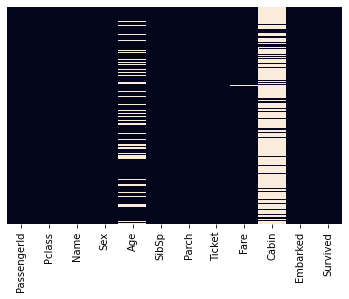

In [121]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [122]:
test['Age'] = test[['Age','Pclass']].apply(age_aprox,axis=1)

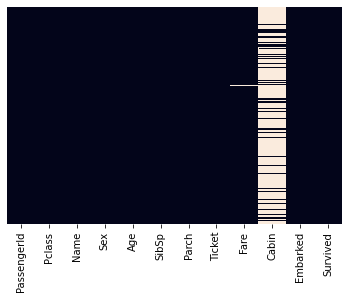

In [123]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [124]:
test.drop('Cabin',axis=1,inplace=True)

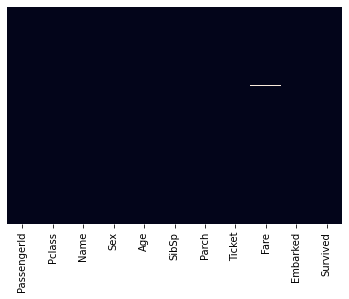

In [125]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [126]:
test.dropna(inplace=True)

In [127]:
sex = pd.get_dummies(test.Sex,drop_first=True)

In [128]:
embarked = pd.get_dummies(test.Embarked,drop_first=True)

In [129]:
y = test.Survived
test.drop(['Name','Ticket','Sex','Embarked',], axis=1, inplace=True)

In [132]:
type(y)

pandas.core.series.Series

In [131]:
test = pd.concat([test,sex,embarked],axis=1)
test.to_csv('test')
print(test)
test.drop(['Survived'], axis=1, inplace=True)

     PassengerId  Pclass        Age  SibSp  Parch      Fare  Survived  male  \
0            892       3  25.140620      0      0    7.8292         0     1   
1            893       3  25.140620      1      0    7.0000         1     0   
2            894       2  29.877630      0      0    9.6875         0     1   
3            895       3  25.140620      0      0    8.6625         0     1   
4            896       3  25.140620      1      1   12.2875         1     0   
..           ...     ...        ...    ...    ...       ...       ...   ...   
413         1305       3  25.140620      0      0    8.0500         0     1   
414         1306       1  38.233441      0      0  108.9000         1     0   
415         1307       3  25.140620      0      0    7.2500         0     1   
416         1308       3  25.140620      0      0    8.0500         0     1   
417         1309       3  25.140620      1      1   22.3583         0     1   

     Q  S  
0    1  0  
1    0  1  
2    1  0  
3  

In [36]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,25.140620,0,0,7.8292,1,1,0
1,893,3,25.140620,1,0,7.0000,0,0,1
2,894,2,29.877630,0,0,9.6875,1,1,0
3,895,3,25.140620,0,0,8.6625,1,0,1
4,896,3,25.140620,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,25.140620,0,0,8.0500,1,0,1
414,1306,1,38.233441,0,0,108.9000,0,0,0
415,1307,3,25.140620,0,0,7.2500,1,0,1
416,1308,3,25.140620,0,0,8.0500,1,0,1


In [59]:
test.to_csv('test')

In [37]:
X=df[['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','male', 'Q', 'S']]
Y=df['Survived']

In [58]:
df.to_csv('Titanic_sorted')

In [48]:
pd.concat([X,y],axis=1).to_csv('Titanic_sorted')

In [38]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
logmodel = LogisticRegression()

In [40]:
logmodel.fit(X,Y)

E:\Software\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,25.140620,0,0,7.8292,1,1,0
1,893,3,25.140620,1,0,7.0000,0,0,1
2,894,2,29.877630,0,0,9.6875,1,1,0
3,895,3,25.140620,0,0,8.6625,1,0,1
4,896,3,25.140620,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,25.140620,0,0,8.0500,1,0,1
414,1306,1,38.233441,0,0,108.9000,0,0,0
415,1307,3,25.140620,0,0,7.2500,1,0,1
416,1308,3,25.140620,0,0,8.0500,1,0,1


In [42]:
np.nan in test

False

In [43]:
predictions = logmodel.predict(test)

In [44]:
from sklearn.metrics import classification_report

In [45]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [46]:
y.count()

417

In [47]:
print(classification_report(y,predictions))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       265
           1       0.88      0.97      0.92       152

    accuracy                           0.94       417
   macro avg       0.93      0.95      0.94       417
weighted avg       0.94      0.94      0.94       417

